<a href="https://colab.research.google.com/github/Mifthahuddin/Posttest-1-Data-Mining/blob/main/posttest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Posttest Praktikum Sistem Informasi </h1>

NIM 2109116098

NAMA Mifthahuddin

In [2]:
import pandas as pd
import statistics
import seaborn as sns

In [4]:
df = pd.read_csv("ChurnBank.csv")

In [ ]:
df

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
1,6684,711323283,Attrited Customer,57,M,Uneducated,Married,$60K - $80K,Blue,2527.0
2,4272,794707083,Attrited Customer,50,M,College,Single,$80K - $120K,Blue,3495.0
3,9759,709657533,Attrited Customer,44,M,High School,Unknown,$120K +,Blue,7793.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
5,9597,715076358,Attrited Customer,57,M,Post-Graduate,Unknown,$80K - $120K,Blue,23714.0
6,5009,804829533,Attrited Customer,59,M,High School,Single,$60K - $80K,Blue,24621.0
7,8200,712144158,Attrited Customer,53,F,Graduate,Single,Less than $40K,Blue,2370.0
8,5016,795599883,Attrited Customer,57,F,Uneducated,Married,Unknown,Blue,2404.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0


#Business Understanding
Naive Bayes digunakan untuk berbagai fungsi dalam perusahaan, seperti analisis sentimen, spam filtering, prediksi keputusan bisnis, dan pengelompokan data.
Fungsi dataset dibawah untuk mengelompokan customer

#Data Understanding

In [7]:
df1 = df[df["Attrition_Flag"] == "Attrited Customer"]
df2 = df[df["Attrition_Flag"] != "Attrited Customer"]
df3 = df[df["Customer_Age"] < 50]
df4 = df[df["Marital_Status"] == "Single"]

In [8]:
# df1 dataset dengan label target AttiredCustomer
df1

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
1,6684,711323283,Attrited Customer,57,M,Uneducated,Married,$60K - $80K,Blue,2527.0
2,4272,794707083,Attrited Customer,50,M,College,Single,$80K - $120K,Blue,3495.0
3,9759,709657533,Attrited Customer,44,M,High School,Unknown,$120K +,Blue,7793.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
5,9597,715076358,Attrited Customer,57,M,Post-Graduate,Unknown,$80K - $120K,Blue,23714.0
6,5009,804829533,Attrited Customer,59,M,High School,Single,$60K - $80K,Blue,24621.0
7,8200,712144158,Attrited Customer,53,F,Graduate,Single,Less than $40K,Blue,2370.0
8,5016,795599883,Attrited Customer,57,F,Uneducated,Married,Unknown,Blue,2404.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0


In [9]:
# df2 dengan label bukan Attrired customer
df2

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
10,8139,809844108,Existing Customer,48,M,Doctorate,Single,$60K - $80K,Blue,8086.0
11,176,716264358,Existing Customer,53,M,Uneducated,Married,$80K - $120K,Blue,26792.0
12,8020,778163508,Existing Customer,37,F,High School,Married,Unknown,Blue,5245.0
13,357,711857733,Existing Customer,49,M,Uneducated,Single,$60K - $80K,Blue,18584.0
14,6562,720070383,Existing Customer,41,F,Uneducated,Single,Unknown,Blue,2429.0
15,4563,809809008,Existing Customer,47,F,Graduate,Married,Less than $40K,Blue,3111.0
16,10084,718161708,Existing Customer,46,F,Graduate,Married,Less than $40K,Blue,7562.0
17,5725,771079833,Existing Customer,40,F,High School,Single,Less than $40K,Blue,1438.3
18,2587,711639708,Existing Customer,42,M,Graduate,Single,$60K - $80K,Blue,1438.3
19,8226,713700258,Existing Customer,55,F,Post-Graduate,Married,Unknown,Blue,2953.0


In [10]:
# df3 dengan tabel untuk usia dibawah 50 tahun
df3

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
3,9759,709657533,Attrited Customer,44,M,High School,Unknown,$120K +,Blue,7793.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0
10,8139,809844108,Existing Customer,48,M,Doctorate,Single,$60K - $80K,Blue,8086.0
12,8020,778163508,Existing Customer,37,F,High School,Married,Unknown,Blue,5245.0
13,357,711857733,Existing Customer,49,M,Uneducated,Single,$60K - $80K,Blue,18584.0
14,6562,720070383,Existing Customer,41,F,Uneducated,Single,Unknown,Blue,2429.0
15,4563,809809008,Existing Customer,47,F,Graduate,Married,Less than $40K,Blue,3111.0
16,10084,718161708,Existing Customer,46,F,Graduate,Married,Less than $40K,Blue,7562.0


In [11]:
# df4 customer yang statusnya itu single
df4

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
2,4272,794707083,Attrited Customer,50,M,College,Single,$80K - $120K,Blue,3495.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
6,5009,804829533,Attrited Customer,59,M,High School,Single,$60K - $80K,Blue,24621.0
7,8200,712144158,Attrited Customer,53,F,Graduate,Single,Less than $40K,Blue,2370.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0
10,8139,809844108,Existing Customer,48,M,Doctorate,Single,$60K - $80K,Blue,8086.0
13,357,711857733,Existing Customer,49,M,Uneducated,Single,$60K - $80K,Blue,18584.0
14,6562,720070383,Existing Customer,41,F,Uneducated,Single,Unknown,Blue,2429.0
17,5725,771079833,Existing Customer,40,F,High School,Single,Less than $40K,Blue,1438.3


In [12]:
# Fungsi df.info() untuk memberikan info mengenai data frame, tipe data dari setiap kolom, jumlah data, dan apakah terdapat 
# data yang hilang (missing values) dalam setiap kolom. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20 non-null     int64  
 1   CLIENTNUM        20 non-null     int64  
 2   Attrition_Flag   20 non-null     object 
 3   Customer_Age     20 non-null     int64  
 4   Gender           20 non-null     object 
 5   Education_Level  20 non-null     object 
 6   Marital_Status   20 non-null     object 
 7   Income_Category  20 non-null     object 
 8   Card_Category    20 non-null     object 
 9   Credit_Limit     20 non-null     float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


1. Kolom "Unnamed: 0" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah integer.
2. Kolom "CLIENTNUM" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah integer.
3. Kolom "Attrition_Flag" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah object (string).
4. Kolom "Customer_Age" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah integer.
5. Kolom "Gender" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah object (string).
6. Kolom "Education_Level" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah object (string).
7. Kolom "Marital_Status" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah object (string).
8. Kolom "Income_Category" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah object (string).
9. Kolom "Card_Category" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah object (string).
10. Kolom "Credit_Limit" memiliki 20 nilai yang tidak hilang dan tipe datanya adalah float.


# Explore Data

# Visualisasi Comparasion

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

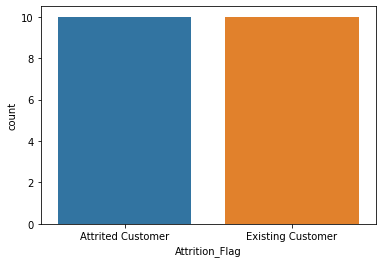

In [13]:
# menampilkan banyak yang attired customer dan tidak
sns.countplot(data=df,x="Attrition_Flag")

Attrition Flag  dan Existing Customer terdapat 10 data

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

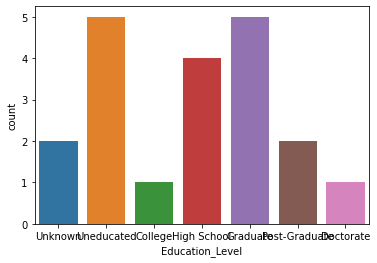

In [14]:
# menampilkan education level berdasarkan kategori
sns.countplot(data=df,x="Education_Level")

Education nya Graduated dan Uneducated memiliki data tertinggi ada 5 orang. Doctorate dan College yang tersedikit yaitu 1 orang 

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

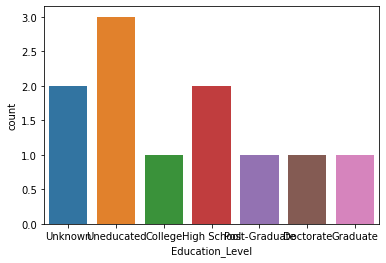

In [15]:
# menampilkan berapa banyak Education level berdasarkan gender (Male)
sns.countplot(data=df[df["Gender"] == "M"],x="Education_Level")

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

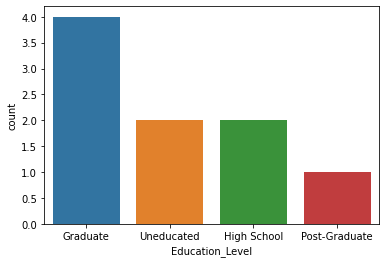

In [16]:
# menampilkan berapa banyak Education level berdasarkan gender (Female)
sns.countplot(data=df[df["Gender"] == "F"],x="Education_Level")

<h4> Penjelasan
<h6>menampilkan banyak yang attired customer dan tidak
<h6>menampilkan education level berdasarkan kategori
<h6>menampilkan berapa banyak Education level berdasarkan gender (Male)
<h6> menampilkan berapa banyak Education level berdasarkan gender (Female)


# Visualisasi Distribution

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

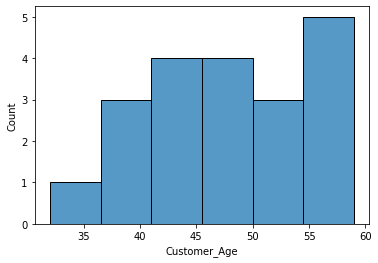

In [17]:
sns.histplot(data=df,x="Customer_Age")

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

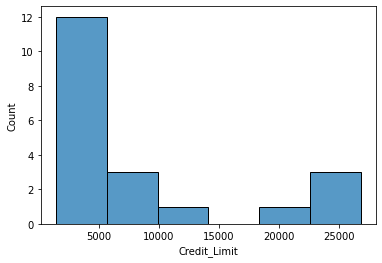

In [18]:
sns.histplot(data=df,x="Credit_Limit")

<h2> Penjelasan
<h6> data: objek DataFrame yang berisi data yang akan divisualisasikan
<h6> x: DataFrame yang berisi data yang akan divisualisasikan.
<h6>  sintaks tersebut nanti menghasilkan visualisasi histogram dengan sumbu x adalah kolom "Customer_Age" atau "Credit_Limit" pada DataFrame df, dan juga menampilkan distribusi KDE di atas histogram

<AxesSubplot:xlabel='Customer_Age'>

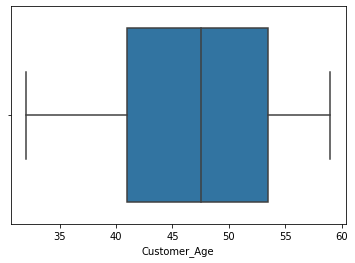

In [19]:
sns.boxplot(data=df,x="Customer_Age")

<AxesSubplot:xlabel='Credit_Limit'>

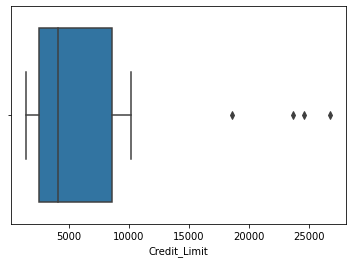

In [20]:
sns.boxplot(data=df,x="Credit_Limit")

<h2> Penjelasan
<h6> data: objek DataFrame yang berisi data yang akan divisualisasikan
<h6> x: DataFrame yang berisi data yang akan divisualisasikan.
<h6> Untuk sintaks untuk membuat plot kotak yang sumbu x-nya adalah kolom Customer_Age atau Credit_Limit dari DataFrame df. Plot kotak menampilkan informasi tentang median (setengah garis), kuartil (kotak), rentang interkuartil (jarak antara kuartil ke-1 dan ke-3), dan nilai minimum dan maksimum (garis vertikal) untuk Umur_Pelanggan atau Batas_Kredit. Variabel. Plot kotak juga dapat menampilkan outlier saat nilainya berada di luar rentang kuartil

<h2> Visualisasi Relationship


<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

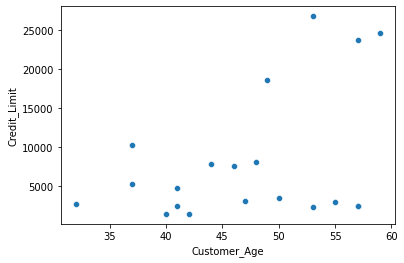

In [21]:
# scatterplot untuk umur customer dan credit card limit
sns.scatterplot(data=df,x="Customer_Age",y="Credit_Limit")

<h2> Visualisasi Compotition

In [22]:
import plotly.express as px

In [ ]:
# pielot Income Category
px.pie(df,names="Income_Category")

In [23]:
# pielot Education Level
px.pie(df,names="Education_Level")

<h2> Opsional 2

<AxesSubplot:xlabel='Gender', ylabel='Credit_Limit'>

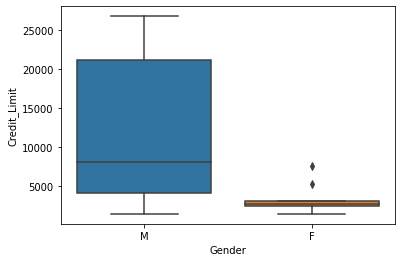

In [24]:
# visualisasi boxplot Credit Card Limit dengan Jenis Kelamin sebagai pemisahnya (color)
sns.boxplot(data=df,x='Gender', y='Credit_Limit')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

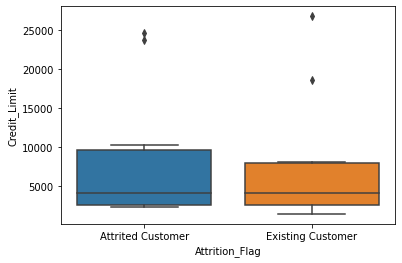

In [25]:
# visualisasi boxplot Credit Card Limit dengan Attrition Flag sebagai pemisahnya (color)
sns.boxplot(data=df,x='Attrition_Flag', y='Credit_Limit')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

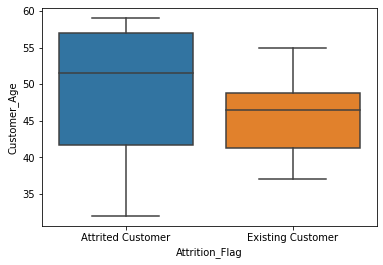

In [26]:
# visualisasi boxplot Age dengan Attrition Flag sebagai pemisahnya (color)
sns.boxplot(data=df,x='Attrition_Flag', y='Customer_Age')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

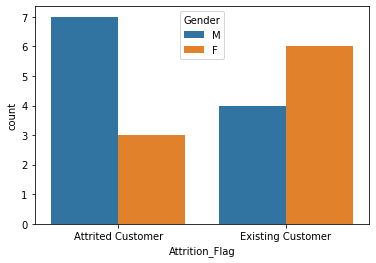

In [27]:
# visualisasi countplot  Attrition Flag dengan jenis kelamin sebagai pemisahnya (color)
sns.countplot(data=df,x='Attrition_Flag', hue='Gender')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

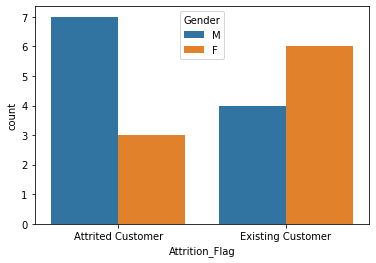

In [28]:
# visualisasi heatmap untuk Setiap variabel numerik yang ada
sns.countplot(data=df,x='Attrition_Flag', hue='Gender')

## Algoritma Naive Bayes dan Preprocessing (pengenalan)

In [ ]:
df_baru = df.drop(['Unnamed: 0', 'CLIENTNUM', 'Customer_Age', 'Credit_Limit'], axis=1)

df_baru

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Attrited Customer,M,Unknown,Single,$40K - $60K,Blue
1,Attrited Customer,M,Uneducated,Married,$60K - $80K,Blue
2,Attrited Customer,M,College,Single,$80K - $120K,Blue
3,Attrited Customer,M,High School,Unknown,$120K +,Blue
4,Attrited Customer,F,Graduate,Single,Less than $40K,Blue
5,Attrited Customer,M,Post-Graduate,Unknown,$80K - $120K,Blue
6,Attrited Customer,M,High School,Single,$60K - $80K,Blue
7,Attrited Customer,F,Graduate,Single,Less than $40K,Blue
8,Attrited Customer,F,Uneducated,Married,Unknown,Blue
9,Attrited Customer,M,Unknown,Single,$80K - $120K,Blue


In [ ]:
# definisikan fungsi naive_bayes
def naive_bayes(kategori):
    total = len(df_baru)
# Menghitung jumlah data pada kolom 'Attrition_Flag' (target) yang merupakan 'Existing Customer' dan 'Attrited Customer'.
    target_counts = df_baru['Attrition_Flag'].value_counts()
    existing_count = target_counts['Existing Customer']
    attrited_count = target_counts['Attrited Customer']

    existing_likelihood = 1
    attrited_likelihood = 1

# Melakukan iterasi pada setiap item pada dictionary kategori yang merupakan variabel-variabel yang digunakan sebagai feature.
    for key, value in kategori.items():
        existing_likelihood *= (len(df_baru[(df_baru[key] == value) & (df_baru['Attrition_Flag'] == 'Existing Customer')]) / existing_count)
        attrited_likelihood *= (len(df_baru[(df_baru[key] == value) & (df_baru['Attrition_Flag'] == 'Attrited Customer')]) / attrited_count)

# Menghitung likelihood dari kategori 'Existing Customer dan Attrited Customer' pada feature tertentu.
    existing_posterior = existing_likelihood * (existing_count / total)
    attrited_posterior = attrited_likelihood * (attrited_count / total)

# Membandingkan nilai posterior probability dari masing-masing kategori dan mengembalikan hasil prediksi dan nilai posterior probability yang lebih tinggi.
    if existing_posterior > attrited_posterior:
        return ('Existing Customer', round(existing_posterior, 3))
    else:
        return ('Attrited Customer', round(attrited_posterior, 3))

In [ ]:
hasil = naive_bayes({'Gender': 'M', 'Education_Level': 'High School', 'Marital_Status' : 'Married', 'Income_Category' : '$80K - $120K', 'Card_Category' : 'Blue'})

hasil

('Attrited Customer', 0.004)